# Introduction to Data Processing With Tidyverse 



- Introduction
- RStudio
- Read Excel Data
    - Import `tidyverse`
    - Read Excel data with `readxl`
    - Inspect a data frame
    - Add parameters to read Excel data properly
    - Rename columns/variables
    - Exercise 1: read in data
- Tidy Data
    - Obervations and variables
    - Gather messy data to create tidy data
    - Exercise 2: tidy the tv-program dataframe 
- Process Data
    - Handle missing values 
    - Select variables
    - Combine variables 
    - Filter observations
    - Arrange observations
    - Exercise 3: arrange income by multiple columns
- Summarise (Aggregate) Data
    - Bigger datasets
    - Date columns
    - Group by common values
    - Aggregation functions: sum, mean, first, median, count
    - Exercise 4 - investigate trip duration median of 2 months
- Combine Data Tables
    - Append tables of similar data
    - Exercise 5 - explore anti join
    - Join tables with common variables
    - Exercise 6 - finalize cleanup
- Sharing Insights
    - Simple visualizations with ggplot2
    - Mess up data for presentation with pivot
    - More visualizations
    - Save to Excel (and other formats)

## Handy shortcuts in RStudio:
- The pipe operator `%>%` : ctrl + shift + m
- run by line windows: shift + enter 
- run by line mac: command + enter)
- indent code mac: command + I 
- comment multiple lines: shift + command + c

## Read Excel Data

### Importing packages

In [1]:
library(tidyverse)
library(readxl)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6      v purrr   0.3.4 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### Read Excel data with readxl

In [2]:
# set working directory:
setwd("/Users/avoje001/Documents/customers/FFI/intro_data_processing")
data_path = paste(getwd(),"/data/",sep="")

#pd.read_excel("../data/kap1.xlsx")
read_excel(paste(getwd(),"/data/kap1.xlsx",sep="")) %>% View()


New names:
* `` -> `...2`


Dette regnearket inneholder tallene bak figurene i,...2
<chr>,<chr>
Kapittel 1 Hovedlinjer i den <U+00F8>konomiske politikken og utsiktene for norsk <U+00F8>konomi,NA
NA,NA
Figur 1.1,Samlet overskudd i statsbudsjettet og Statens pensjonsfond. Pst. av trend-BNP for Fastlands-Norge
Figur 1.2,Finanspolitisk respons p<U+00E5> virusutbruddet i utvalgte land


In [3]:
read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), sheet="1.2") %>% View()

#pd.read_excel("../data/kap1.xlsx", sheet_name="1.2")

New names:
* `` -> `...3`


Figur 1.2,Finanspolitisk respons på virusutbruddet i utvalgte land.,...3
<chr>,<chr>,<chr>
NA,Pst. av BNP,NA
NA,NA,NA
NA,NA,NA
NA,Budsjettiltak,L<U+00E5>n og garantier
India,0.7,0
Frankrike,0.7,13.9
Russland,0.9,0.6
Spania,1.2,9.8000000000000007
Italia,1.2,32.4


### Inspect information in data frame

In [4]:
summary(read_excel(paste(getwd(),"/data/kap1.xlsx",sep="")))
summary(read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), sheet="1.2"))

#pd.read_excel("../data/kap1.xlsx", sheet_name="1.2").info()

New names:
* `` -> `...2`


 Dette regnearket inneholder tallene bak figurene i     ...2          
 Length:4                                           Length:4          
 Class :character                                   Class :character  
 Mode  :character                                   Mode  :character  

New names:
* `` -> `...3`


  Figur 1.2        
 Length:23         
 Class :character  
 Mode  :character  
 Finanspolitisk respons p<U+00E5> virusutbruddet i utvalgte land. \r\n       
 Length:23                                                            
 Class :character                                                     
 Mode  :character                                                     
     ...3          
 Length:23         
 Class :character  
 Mode  :character  

### Add parameters to read Excel data properly

In [6]:
read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), sheet="1.2", skip=5) %>% 
  View()


#pd.read_excel("../data/kap1.xlsx", sheet_name="1.2", header=5)

India,0.7,0
<chr>,<dbl>,<chr>
Frankrike,0.7,13.9
Russland,0.9,0.6
Spania,1.2,9.8000000000000007
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0
Nederland,2.7,-
Brasil,2.9,4.2


In [7]:
read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), sheet="1.2", skip=4) %>% 
  View()

#pd.read_excel("../data/kap1.xlsx", sheet_name="1.2", header=4)


New names:
* `` -> `...1`


...1,Budsjettiltak,Lån og garantier
<chr>,<dbl>,<chr>
India,0.7,0
Frankrike,0.7,13.9
Russland,0.9,0.6
Spania,1.2,9.8000000000000007
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0
Nederland,2.7,-


In [9]:
budget <- read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), 
                     sheet="1.2", skip=4)

#budget = pd.read_excel("../data/kap1.xlsx", sheet_name="1.2", header=4)

New names:
* `` -> `...1`


In [10]:
summary(budget)

#budget.info()

     ...1           Budsjettiltak    L<U+00E5>n og garantier       
 Length:19          Min.   : 0.700   Length:19              
 Class :character   1st Qu.: 1.350   Class :character       
 Mode  :character   Median : 2.900   Mode  :character       
                    Mean   : 3.663                          
                    3rd Qu.: 5.000                          
                    Max.   :10.600                          

In [11]:
# extract first row: 

budget[1,]

budget %>% head(1) %>% View()

#budget.loc[0]

...1,Budsjettiltak,Lån og garantier
<chr>,<dbl>,<chr>
India,0.7,0


...1,Budsjettiltak,Lån og garantier
<chr>,<dbl>,<chr>
India,0.7,0


In [12]:
# extract the rows where country is Norway
budget %>% 
  rename(Land = 1) %>% 
  filter(Land =="Norge") %>% View()
#budget.loc["Norge"]

Land,Budsjettiltak,Lån og garantier
<chr>,<dbl>,<chr>
Norge,5.1,4


In [ ]:
#pd.read_excel("../data/kap1.xlsx", sheet_name="1.2", header=4, index_col=0)

,Budsjettiltak,Lån og garantier
,,
India,0.7,0
Frankrike,0.7,13.9
Russland,0.9,0.6
Spania,1.2,9.8
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0
Nederland,2.7,-


In [ ]:
#budget = pd.read_excel("../data/kap1.xlsx", sheet_name="1.2", header=4, index_col=0)

In [ ]:
#budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, India to Australia
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Budsjettiltak     19 non-null     float64
 1   Lån og garantier  19 non-null     object 
dtypes: float64(1), object(1)
memory usage: 456.0+ bytes


In [ ]:
#budget.describe()

,Budsjettiltak
count,19.000000
mean,3.663158
std,2.928445
min,0.700000
25%,1.350000
50%,2.900000
75%,5.000000
max,10.600000


In [ ]:
#budget.loc["Norge"]

Budsjettiltak       5.1
Lån og garantier      4
Name: Norge, dtype: object

In [ ]:
#budget.loc[0]

KeyError: 0

In [ ]:
# select columns the dplyr way
budget %>% select(Budsjettiltak) %>% View()


Budsjettiltak       0.7
Lån og garantier      0
Name: India, dtype: object

In [ ]:
budget %>% select(Budsjettiltak) %>% View()

#budget.Budsjettiltak

 
India             0.7
Frankrike         0.7
Russland          0.9
Spania            1.2
Italia            1.2
Korea             1.5
Finland           1.7
Kina              2.5
Nederland         2.7
Brasil            2.9
Storbritannia     3.1
Sverige           3.4
Tyskland          4.4
Danmark           4.9
Norge             5.1
Canada            5.2
USA               6.9
Japan            10.0
Australia        10.6
Name: Budsjettiltak, dtype: float64

In [ ]:
budget %>% select("Lån og garantier") %>% View()

#budget.Lån og garantier

SyntaxError: invalid syntax (1557260898.py, line 1)

In [ ]:
# you can also select columns the base-R way

budget$`Lån og garantier`

#budget["Lån og garantier"]

 
India               0
Frankrike        13.9
Russland          0.6
Spania            9.8
Italia           32.4
Korea             6.4
Finland           5.4
Kina                0
Nederland           -
Brasil            4.2
Storbritannia    15.7
Sverige             5
Tyskland         29.6
Danmark           5.3
Norge               4
Canada            3.3
USA               4.2
Japan            10.4
Australia         1.9
Name: Lån og garantier, dtype: object

In [18]:
# look now at column names:
colnames(budget)

[1] "...1"             "Budsjettiltak"    "L<U+00E5>n og garantier"

ERROR: Error in colnames[3]: object of type 'closure' is not subsettable


In [16]:
# fix the column names and store everything in a nice dataframe
budget <- read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), sheet="1.2", skip=4) %>% 
          rename(land = 1,
                 tiltak = Budsjettiltak, 
                 lån = `Lån og garantier`)

#budget = pd.read_excel(
#    "../data/kap1.xlsx", sheet_name="1.2", header=4, index_col=0
#).rename(columns={"Budsjettiltak": "tiltak", "Lån og garantier": "lån"})

ERROR: Error in parse(text = x, srcfile = src): <text>:5:26: unexpected '>'
4:                  tiltak = Budsjettiltak, 
5:                  l<U+00E5>
                            ^


### Exercise 1:

Read data from the file ..\data\driftsinntekter-2021.xls with R.
Which parameters do you need to specify?

Use the readxl documentation to look up available parameters.

https://readxl.tidyverse.org/

In [20]:
#solution:
read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""), skip=1) %>% View()


#pd.read_excel("../data/driftsinntekter-2021.xlsx", header=1)

Category,2019,2020,2021
<chr>,<chr>,<chr>,<chr>
Basistilskudd,216,203,202
Basistilskudd personell og kompetanse,-,-,3
Forvaltningsmidler,307.7,196.9,-
Tilskudd H.U. Sverdrup II,284.3,274.2,200.1
Tilskudd Kjemiidentifikasjonslab,107.1,55.7,88.8
CBRNE-satsningen,-,-,85
Tilskudd og overf<U+00F8>ringer,389.4,439.1,341.8
Strategiske FoU-midler,2131.1,2109,2159
Konsept- og forprosjekteringsmidler,838.2,696.2,635.1


## Tidy Data

### Observations and variables

Hadley Wickham introduced the term **tidy data** (<https://tidyr.tidyverse.org/articles/tidy-data.html>). Data tidying is a way to **structure DataFrames to facilitate analysis**.

A DataFrame is tidy if:

- Each variable is a column
- Each observation is a row
- Each DataFrame contains one observational unit

Note that tidy data principles are closely tied to normalization of relational databases.

In [21]:
income <- read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
          rename(category=Category)

#income = pd.read_excel("../data/driftsinntekter-2021.xlsx", header=1).rename(
#    columns={"Category": "category"}
#)
#income

Is the `income` data frame tidy?

> No, _2019_, _2020_, and _2021_ are not variables. They are values of a _year_ variable

### Gather messy datasets to tidy them

In [22]:
read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
  rename(category=Category) %>% 
  gather() %>% View()

key,value
<chr>,<chr>
category,Basistilskudd
category,Basistilskudd personell og kompetanse
category,Forvaltningsmidler
category,Tilskudd H.U. Sverdrup II
category,Tilskudd Kjemiidentifikasjonslab
category,CBRNE-satsningen
category,Tilskudd og overf<U+00F8>ringer
category,Strategiske FoU-midler
category,Konsept- og forprosjekteringsmidler


In [18]:
read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
  rename(category=Category) %>% 
  gather(category) %>% View()

read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
  rename(category=Category) %>% 
  gather(year,income,"2019":"2021") %>% View()

#income.melt(id_vars=["category"])

,category,variable,value
0,Basistilskudd,2019,216
1,Basistilskudd personell og kompetanse,2019,-
2,Forvaltningsmidler,2019,307.7
3,Tilskudd H.U. Sverdrup II,2019,284.3
4,Tilskudd Kjemiidentifikasjonslab,2019,107.1
5,CBRNE-satsningen,2019,-
6,Tilskudd og overføringer,2019,389.4
7,Strategiske FoU-midler,2019,2131.1
8,Konsept- og forprosjekteringsmidler,2019,838.2
9,Forsvarssektoren,2019,3759


In [19]:
income.melt(id_vars=["category"], var_name="year")

,category,year,value
0,Basistilskudd,2019,216
1,Basistilskudd personell og kompetanse,2019,-
2,Forvaltningsmidler,2019,307.7
3,Tilskudd H.U. Sverdrup II,2019,284.3
4,Tilskudd Kjemiidentifikasjonslab,2019,107.1
5,CBRNE-satsningen,2019,-
6,Tilskudd og overføringer,2019,389.4
7,Strategiske FoU-midler,2019,2131.1
8,Konsept- og forprosjekteringsmidler,2019,838.2
9,Forsvarssektoren,2019,3759


In [20]:
income <- read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
          rename(category=Category) %>% 
          gather(year, income, "2019":"2021")

#income.melt(id_vars=["category"], var_name="year", value_name="income")

,category,year,income
0,Basistilskudd,2019,216
1,Basistilskudd personell og kompetanse,2019,-
2,Forvaltningsmidler,2019,307.7
3,Tilskudd H.U. Sverdrup II,2019,284.3
4,Tilskudd Kjemiidentifikasjonslab,2019,107.1
5,CBRNE-satsningen,2019,-
6,Tilskudd og overføringer,2019,389.4
7,Strategiske FoU-midler,2019,2131.1
8,Konsept- og forprosjekteringsmidler,2019,838.2
9,Forsvarssektoren,2019,3759


In [21]:
income <- read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
          rename(category=Category) %>% 
          gather(year, income, "2019":"2021")


#income = (
#    pd.read_excel("../data/driftsinntekter-2021.xlsx", header=1)
#    .rename(columns={"Category": "category"})
#    .melt(id_vars=["category"], var_name="year", value_name="income")
#)

### Visualizations with ggplot2

<AxesSubplot: >

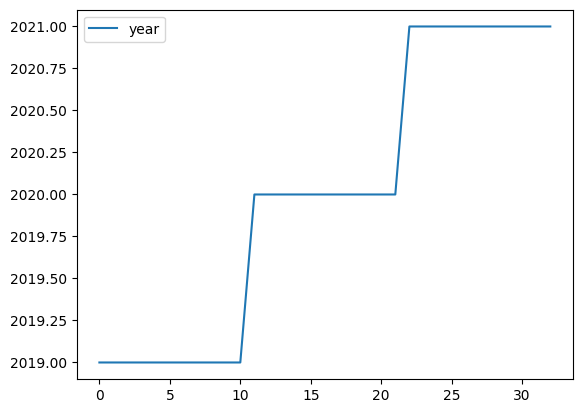

In [22]:
income %>%
  ggplot() +
  geom_point(aes(x=year,y=amount))

#income.plot()

<AxesSubplot: xlabel=' '>

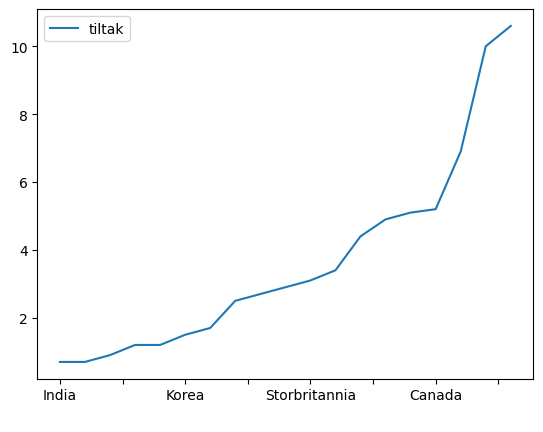

In [23]:
budget %>%
  arrange(-desc(lån)) %>%
  mutate(land = factor(land, levels=land)) %>% 
  ggplot() +
  geom_point(aes(x=land,y=lån))


#budget.plot()

<AxesSubplot: ylabel=' '>

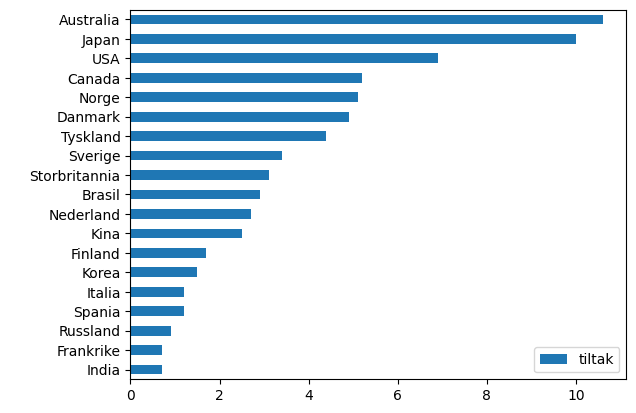

In [24]:
budget %>%
  arrange(-desc(tiltak)) %>% 
  mutate(land = factor(land, levels=land)) %>% 
  ggplot() +
  geom_col(aes(tiltak,land))

#budget.plot.barh()

### Exercise

Tidy the following data frame:

In [25]:
#columns with rows:

hour <- c(19, 20, 21, 22)
NRK1 <- c("Dagsrevyen", "Beat for beat", "Nytt på nytt", "Lindmo")
TV2 <- c("Kjære landsmenn", "Forræder", "21-nyhetene", "Farfar")
TVNorge <- c("The Big Bang Theory", "Alltid beredt", "Kongen befaler", "Praktisk info")

#dataframe:
schedule <- data.frame(hour,NRK1,TV2,TVNorge)


,hour,NRK1,TV2,TVNorge
0,19,Dagsrevyen,Kjære landsmenn,The Big Bang Theory
1,20,Beat for beat,Forræder,Alltid beredt
2,21,Nytt på nytt,21-nyhetene,Kongen befaler
3,22,Lindmo,Farfar,Praktisk info


In [26]:
schedule <- schedule %>% 
  gather(channel, program, "NRK1":"TVNorge") %>% View()

#schedule.melt(id_vars=["hour"], var_name="channel", value_name="program")

,hour,channel,program
0,19,NRK1,Dagsrevyen
1,20,NRK1,Beat for beat
2,21,NRK1,Nytt på nytt
3,22,NRK1,Lindmo
4,19,TV2,Kjære landsmenn
5,20,TV2,Forræder
6,21,TV2,21-nyhetene
7,22,TV2,Farfar
8,19,TVNorge,The Big Bang Theory
9,20,TVNorge,Alltid beredt


## Process Data

### Handle missing values

In [27]:
summary(income)
#income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  33 non-null     object
 1   year      33 non-null     object
 2   income    33 non-null     object
dtypes: object(3)
memory usage: 920.0+ bytes


In [28]:
# specifying column types:
read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
  rename(category=Category) %>% 
  gather(year, income, "2019":"2021") %>% 
  mutate(year = as.factor(year)) %>% 
  summary()

#(
#    pd.read_excel("../data/driftsinntekter-2021.xlsx", header=1)
#    .rename(columns={"Category": "category"})
#    .melt(id_vars=["category"], var_name="year", value_name="income")
#    .astype({"year": "int"})
#).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  33 non-null     object
 1   year      33 non-null     int64 
 2   income    33 non-null     object
dtypes: int64(1), object(2)
memory usage: 920.0+ bytes


In [29]:
# %% Difficulty of casting missing values
# (
#   pd.read_excel("../data/driftsinntekter-2021.xlsx", header=1)
#   .rename(columns={"Category": "category"})
#   .melt(id_vars=["category"], var_name="year", value_name="income")
#   .astype({"year": "int", "income": "float"})
# ).info()

read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
  rename(category=Category) %>% 
  gather(year, income, "2019":"2021") %>% 
  mutate(year = as.factor(year),
         income = as.numeric(income)
         ) %>% 
  summary()


ValueError: could not convert string to float: '-'

In [ ]:
# %% Fix this by ddjusting NA-encoding on read-in: 
# (
#   pd.read_excel("../data/driftsinntekter-2021.xlsx", header=1, na_values="-")
#   .rename(columns={"Category": "category"})
#   .melt(id_vars=["category"], var_name="year", value_name="income")
#   .astype({"year": "int", "income": "float"})
# ).info()
read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1,na="-") %>% 
  rename(category=Category) %>% 
  gather(year, income, "2019":"2021") %>% 
  mutate(year = as.factor(year),
         income = as.numeric(income)
  ) %>% 
  summary()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  33 non-null     object 
 1   year      33 non-null     int64  
 2   income    28 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 920.0+ bytes


In [ ]:
# drop missing values:

# income = (
#   pd.read_excel("../data/driftsinntekter-2021.xlsx", header=1, na_values="-")
#   .rename(columns={"Category": "category"})
#   .melt(id_vars=["category"], var_name="year", value_name="income")
#   .astype({"year": "int", "income": "float"})
# )

# %%
#income.dropna()

income <- read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1,na="-") %>% 
  rename(category=Category) %>% 
  gather(year, income, "2019":"2021") %>% 
  mutate(year = as.factor(year),
         income = as.numeric(income)
  ) 


income %>% 
  drop_na() %>% 
  View()


In [ ]:
# replace NA with anything you want, but specify which column
income %>% 
  replace_na(list(income=0)) %>% 
  View()
income.fillna(0)

,category,year,income
0,Basistilskudd,2019,216.0
1,Basistilskudd personell og kompetanse,2019,0.0
2,Forvaltningsmidler,2019,307.7
3,Tilskudd H.U. Sverdrup II,2019,284.3
4,Tilskudd Kjemiidentifikasjonslab,2019,107.1
5,CBRNE-satsningen,2019,0.0
6,Tilskudd og overføringer,2019,389.4
7,Strategiske FoU-midler,2019,2131.1
8,Konsept- og forprosjekteringsmidler,2019,838.2
9,Forsvarssektoren,2019,3759.0


### Select variables and observations

In [30]:
budget <- read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), 
                     sheet="1.2", skip=4, na="-") %>% 
  rename(land = 1,
         tiltak = Budsjettiltak, 
         lån = `Lån og garantier`) %>% 
  replace_na(list(lån=0)) 


#budget = (
#    pd.read_excel(
#        "../data/kap1.xlsx", sheet_name="1.2", header=4, index_col=0, na_values="-"
#    )
#    .rename(columns={"Budsjettiltak": "tiltak", "Lån og garantier": "lån"})
#    .fillna(0)
#)

In [31]:
budget

,tiltak,lån
,,
India,0.7,0.0
Frankrike,0.7,13.9
Russland,0.9,0.6
Spania,1.2,9.8
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0.0
Nederland,2.7,0.0


In [32]:
#baseR:
budget$tiltak
budget["tiltak"]

 
India             0.7
Frankrike         0.7
Russland          0.9
Spania            1.2
Italia            1.2
Korea             1.5
Finland           1.7
Kina              2.5
Nederland         2.7
Brasil            2.9
Storbritannia     3.1
Sverige           3.4
Tyskland          4.4
Danmark           4.9
Norge             5.1
Canada            5.2
USA               6.9
Japan            10.0
Australia        10.6
Name: tiltak, dtype: float64

In [33]:
# %% dplyr pipe syntax
budget %>% select(land,tiltak)

 
India             0.7
Frankrike         0.7
Russland          0.9
Spania            1.2
Italia            1.2
Korea             1.5
Finland           1.7
Kina              2.5
Nederland         2.7
Brasil            2.9
Storbritannia     3.1
Sverige           3.4
Tyskland          4.4
Danmark           4.9
Norge             5.1
Canada            5.2
USA               6.9
Japan            10.0
Australia        10.6
Name: tiltak, dtype: float64

In [35]:
#budget.loc["Norge"]
budget %>% filter(land=="Norge")


tiltak    5.1
lån       4.0
Name: Norge, dtype: float64

In [36]:
#budget.loc["Sverige":"Norge"]
budget %>% filter(land == "Norge" |  land=="Sverige") 

,tiltak,lån
,,
Sverige,3.4,5.0
Tyskland,4.4,29.6
Danmark,4.9,5.3
Norge,5.1,4.0


In [37]:
budget %>% filter(land=="Norge" | land == "Sverige" | land=="Danmark" | land == "Finland")


,tiltak,lån
,,
Norge,5.1,4.0
Sverige,3.4,5.0
Danmark,4.9,5.3
Finland,1.7,5.4


In [38]:
budget %>% filter(land=="Norge" | land == "Sverige" | 
                    land=="Danmark" | land == "Finland") %>% 
  select(lån)

#budget.loc[["Norge", "Sverige", "Danmark", "Finland"], "lån"]

 
Norge      4.0
Sverige    5.0
Danmark    5.3
Finland    5.4
Name: lån, dtype: float64

In [39]:
budget %>% filter(land=="Norge" | land == "Sverige" | 
                    land=="Danmark" | land == "Finland")

#budget.loc[["Norge", "Sverige", "Danmark", "Finland"], ["lån", "tiltak"]]

,lån,tiltak
,,
Norge,4.0,5.1
Sverige,5.0,3.4
Danmark,5.3,4.9
Finland,5.4,1.7


In [40]:
#budget.iloc[4]
#baseR
budget[5,]
#dplyr
budget %>% slice(5)

tiltak     1.2
lån       32.4
Name: Italia, dtype: float64

In [41]:
#budget.iloc[4:9]
budget[5:9,]
budget %>% slice(5:9)


,tiltak,lån
,,
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0.0
Nederland,2.7,0.0


In [42]:
#budget.iloc[5:8, 0]
budget %>% slice(5:9) %>% select(land, tiltak)


 
Korea      1.5
Finland    1.7
Kina       2.5
Name: tiltak, dtype: float64

In [43]:
#budget.loc["Norge", "tiltak"]
budget %>% filter(land=="Norge") %>% 
  select(tiltak)


5.1

In [44]:
#budget.loc["Norge", budget.columns[1]]
budget %>% filter(land=="Norge") %>% select(3)

4.0

### Combine variables

In [45]:
#budget.tiltak + budget.lån
budget$tiltak + budget$lån


 
India             0.7
Frankrike        14.6
Russland          1.5
Spania           11.0
Italia           33.6
Korea             7.9
Finland           7.1
Kina              2.5
Nederland         2.7
Brasil            7.1
Storbritannia    18.8
Sverige           8.4
Tyskland         34.0
Danmark          10.2
Norge             9.1
Canada            8.5
USA              11.1
Japan            20.4
Australia        12.5
dtype: float64

In [46]:
#budget.assign(total=budget.tiltak + budget.lån)
budget %>% 
  mutate(total = tiltak + lån)


,tiltak,lån,total
,,,
India,0.7,0.0,0.7
Frankrike,0.7,13.9,14.6
Russland,0.9,0.6,1.5
Spania,1.2,9.8,11.0
Italia,1.2,32.4,33.6
Korea,1.5,6.4,7.9
Finland,1.7,5.4,7.1
Kina,2.5,0.0,2.5
Nederland,2.7,0.0,2.7


### Filter observations

In [47]:
#budget.query("tiltak > 6")
budget %>% 
  filter(tiltak > 6)


,tiltak,lån
,,
USA,6.9,4.2
Japan,10.0,10.4
Australia,10.6,1.9


In [48]:
#budget.query("lån < 3")
budget %>% 
  filter(lån < 3)


,tiltak,lån
,,
India,0.7,0.0
Russland,0.9,0.6
Kina,2.5,0.0
Nederland,2.7,0.0
Australia,10.6,1.9


In [49]:
#budget.query("tiltak >= lån")
budget %>% filter(tiltak >= lån)


,tiltak,lån
,,
India,0.7,0.0
Russland,0.9,0.6
Kina,2.5,0.0
Nederland,2.7,0.0
Norge,5.1,4.0
Canada,5.2,3.3
USA,6.9,4.2
Australia,10.6,1.9


### Arrange (sort) observations

In [50]:
#budget.sort_values(by="lån")
budget %>% arrange(lån)
budget %>% arrange(desc(lån))


,tiltak,lån
,,
India,0.7,0.0
Nederland,2.7,0.0
Kina,2.5,0.0
Russland,0.9,0.6
Australia,10.6,1.9
Canada,5.2,3.3
Norge,5.1,4.0
USA,6.9,4.2
Brasil,2.9,4.2


In [51]:
#budget.sort_values(by=["lån", "tiltak"])
budget %>% arrange(lån, tiltak)


,tiltak,lån
,,
India,0.7,0.0
Kina,2.5,0.0
Nederland,2.7,0.0
Russland,0.9,0.6
Australia,10.6,1.9
Canada,5.2,3.3
Norge,5.1,4.0
Brasil,2.9,4.2
USA,6.9,4.2


In [52]:
#budget.sort_index()
budget %>% arrange(land)

,tiltak,lån
,,
Australia,10.6,1.9
Brasil,2.9,4.2
Canada,5.2,3.3
Danmark,4.9,5.3
Finland,1.7,5.4
Frankrike,0.7,13.9
India,0.7,0.0
Italia,1.2,32.4
Japan,10.0,10.4


### Exercise 2

Something something driftsinntekter

## Summarise (Aggregate) Data

### Bigger datasets

In [53]:
#pd.read_csv("../data/09.csv")
pd.read_csv("../data/09.csv")

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2022-09-01 03:04:31.178000+00:00,2022-09-01 03:13:01.298000+00:00,510,437,Sentrum Scene,ved Arbeidersamfunnets plass,59.915468,10.751141,583,Galgeberg,langs St. Halvards gate,59.907076,10.779164
1,2022-09-01 03:11:09.104000+00:00,2022-09-01 03:14:52.506000+00:00,223,578,Hallings gate,langs Dalsbergstien,59.922777,10.738655,499,Bjerregaards gate,ovenfor Fredrikke Qvams gate,59.925488,10.746058
2,2022-09-01 03:11:37.861000+00:00,2022-09-01 03:23:23.939000+00:00,706,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,390,Saga Kino,langs Olav Vs gate,59.914240,10.732771
3,2022-09-01 03:13:00.843000+00:00,2022-09-01 03:17:17.639000+00:00,256,735,Oslo Hospital,ved trikkestoppet,59.903213,10.767344,465,Bjørvika,under broen Nylandsveien,59.909006,10.756180
4,2022-09-01 03:13:13.330000+00:00,2022-09-01 03:24:15.758000+00:00,662,525,Myraløkka Øst,ved Bentsenbrua,59.937205,10.760581,443,Sjøsiden ved trappen,Oslo S,59.910154,10.751981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165872,2022-09-30 22:58:48.433000+00:00,2022-09-30 23:36:10.742000+00:00,2242,430,Spikersuppa Vest,ved Nasjonalteateret,59.913720,10.735887,479,Tjuvholmen,ved Bryggegangen,59.909467,10.722509
165873,2022-09-30 22:59:04.940000+00:00,2022-09-30 23:10:24.031000+00:00,679,558,Dokkveien,ved Støperigata,59.910974,10.727700,597,Fredensborg,ved rundkjøringen,59.920995,10.750358
165874,2022-09-30 22:59:20.017000+00:00,2022-09-30 23:03:35.663000+00:00,255,424,Birkelunden,langs Seilduksgata,59.925611,10.760926,744,Hallénparken,ved Vogts gate,59.931530,10.762169
165875,2022-09-30 22:59:41.280000+00:00,2022-09-30 23:07:23.601000+00:00,462,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,469,Studentparlamentet,ved Frydenlund holdeplass,59.920852,10.733357


In [54]:
#trips = pd.read_csv("../data/09.csv")
trips = read_csv(paste(data_path,"/09.csv",sep=""))


In [55]:
#trips.info()
spec(trips)
summary(trips)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165877 entries, 0 to 165876
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   started_at                 165877 non-null  object 
 1   ended_at                   165877 non-null  object 
 2   duration                   165877 non-null  int64  
 3   start_station_id           165877 non-null  int64  
 4   start_station_name         165877 non-null  object 
 5   start_station_description  165876 non-null  object 
 6   start_station_latitude     165877 non-null  float64
 7   start_station_longitude    165877 non-null  float64
 8   end_station_id             165877 non-null  int64  
 9   end_station_name           165877 non-null  object 
 10  end_station_description    165876 non-null  object 
 11  end_station_latitude       165877 non-null  float64
 12  end_station_longitude      165877 non-null  float64
dtypes: float64(4), int64(3), obje

### Date columns

In [56]:
trips = pd.read_csv("../data/09.csv", parse_dates=["started_at", "ended_at"])
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165877 entries, 0 to 165876
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   started_at                 165877 non-null  datetime64[ns, UTC]
 1   ended_at                   165877 non-null  datetime64[ns, UTC]
 2   duration                   165877 non-null  int64              
 3   start_station_id           165877 non-null  int64              
 4   start_station_name         165877 non-null  object             
 5   start_station_description  165876 non-null  object             
 6   start_station_latitude     165877 non-null  float64            
 7   start_station_longitude    165877 non-null  float64            
 8   end_station_id             165877 non-null  int64              
 9   end_station_name           165877 non-null  object             
 10  end_station_description    165876 non-null  object      

### Group by common values

In [57]:
#trips.groupby("start_station_name")
trips %>% group_by(start_station_name)


In [58]:
# group by size
#trips.groupby("start_station_name").size()
trips %>% group_by(start_station_name) %>% tally() %>% View()


start_station_name
7. juni-plassen           959
AHO                      1547
Adamstuen                 316
Aker Brygge              2079
Akerselvallmenningen      661
                         ... 
Vulkan                   1216
Vålerenga                 245
Vår Frelsers gravlund    1442
Økern Portal              144
Økernveien                 86
Length: 263, dtype: int64

In [59]:
# group by size and arrange
#trips.groupby("start_station_name").size().sort_values()
trips %>% group_by(start_station_name) %>% tally() %>% arrange(desc(n)) %>%  View()


start_station_name
Tordenskiolds gate             44
Gaustad T-bane                 58
Furulund                       72
Kværnerveien                   74
Grenseveien                    84
                             ... 
Olaf Ryes plass              1918
Ringnes Park                 1970
Helga Helgesens plass        1984
Aker Brygge                  2079
Alexander Kiellands Plass    2133
Length: 263, dtype: int64

In [60]:
#trips.groupby("start_station_name").size().reset_index()
trips %>% 
  group_by(start_station_name) %>% 
  tally(name="num_trips") %>%
  arrange(desc(num_trips)) %>%  
  View()


,start_station_name,0
0,7. juni-plassen,959
1,AHO,1547
2,Adamstuen,316
3,Aker Brygge,2079
4,Akerselvallmenningen,661
...,...,...
258,Vulkan,1216
259,Vålerenga,245
260,Vår Frelsers gravlund,1442
261,Økern Portal,144


In [24]:
num_trips = trips %>% 
  group_by(start_station_name) %>% 
  tally() %>% 
  rename(num_trips=n) %>% 
  arrange(desc(num_trips)) 


#(
#    trips.groupby("start_station_name")
#    .size()
#    .reset_index()
#    .rename(columns={0: "num_trips"})
#)

ERROR: Error in group_by(., start_station_name): object 'trips' not found


In [23]:
# aggregation per group, summarise groups

trips %>% 
  group_by(start_station_name) %>% 
  summarise(median_duration = median(duration),
            description = first(start_station_description)) %>% 
  View()



ERROR: Error in group_by(., start_station_name): object 'trips' not found


,end_station_name,num_trips
78,Gaustad T-bane,22
176,Rolf Wickstrøms vei,44
127,Kværnerveien,60
33,Borgenveien,60
92,HasleLinje,61
...,...,...
192,Sjøsiden ved trappen,2264
234,Torggata,2266
119,Kirkeristen,2318
96,Helga Helgesens plass,2414


In [64]:
num_trips = (
    trips.groupby("start_station_name")
    .size()
    .reset_index()
    .rename(columns={0: "num_trips"})
    .sort_values(by="num_trips")
)

### Aggregations: sum, mean, median, first, count, ...

In [25]:
trips %>% 
  group_by(start_station_name) %>% 
  summarise(median_duration = median(duration),
            description = first(start_station_description)) %>% 
  View()


ERROR: Error in group_by(., start_station_name): object 'trips' not found


In [69]:

# custom function - not sure this is necessary?
#Mode: The most frequent number—that is, 
#the number that occurs the highest number of times. 
#Example: The mode of {4 , 2, 4, 3, 2, 2} is 2
# will this work?
trips %>% 
  group_by(start_station_name) %>%
  summarise(median_duration = median(duration),
            description = first(start_station_name),
            common_end_station = mode(end_station_name)) %>% 
  View()

# check out the ?mode in terminal
# ? mode tells you what this function does in R

,median_duration,description,common_end_station
start_station_name,,,
7. juni-plassen,423.0,langs Henrik Ibsens gate,OsloMet
AHO,482.0,langs Maridalsveien,Helga Helgesens plass
Adamstuen,521.5,ved trikkestoppen,Vår Frelsers gravlund
Aker Brygge,625.0,ved trikkestopp,Saga Kino
Akerselvallmenningen,738.0,øst for Operaen,Aker Brygge
...,...,...,...
Vulkan,472.0,ved Maridalsveien,Vulkan
Vålerenga,503.0,langs Ingeborgs gate,Helga Helgesens plass
Vår Frelsers gravlund,420.0,langs Ullevålsveien,Akersgata


In [ ]:
# need to make a custom function

mode <- function(x) { 
  names(which.max(table(x))) 
  }

trips %>%
  group_by(start_station_name) %>%
  summarise(median_duration = median(duration),
            description = first(start_station_name),
            common_end_station = mode(end_station_name)) %>% 
  View()


In [70]:
trips %>% 
  group_by(start_station_name, end_station_name) %>% 
  summarise(duration_median=median(duration)) %>%  
  View()


median_duration
start_station_name end_station_name                     
7. juni-plassen    7. juni-plassen                 101.0
                   AHO                             728.0
                   Adamstuen                       711.0
                   Aker Brygge                     281.0
                   Akerselvallmenningen            587.0
...                                                  ...
Økernveien         Tøyen skole                     145.5
                   Tøyenbekken                     308.0
                   Tøyenparken                      72.0
                   Vulkan                          569.0
                   Økern Portal                    668.0

[35930 rows x 1 columns]

In [71]:
trips %>% group_by(start_station_name, end_station_name) %>% 
  summarise(median_duration = median(duration),
            start_station_description = first(start_station_description),
            end_station_description = first(end_station_description)) %>% 
  View()


median_duration  \
start_station_name end_station_name                        
7. juni-plassen    7. juni-plassen                 101.0   
                   AHO                             728.0   
                   Adamstuen                       711.0   
                   Aker Brygge                     281.0   
                   Akerselvallmenningen            587.0   
...                                                  ...   
Økernveien         Tøyen skole                     145.5   
                   Tøyenbekken                     308.0   
                   Tøyenparken                      72.0   
                   Vulkan                          569.0   
                   Økern Portal                    668.0   

                                             start_station_description  \
start_station_name end_station_name                                      
7. juni-plassen    7. juni-plassen            langs Henrik Ibsens gate   
                   AHO                        langs Henrik Ibsens gate   
                   Adamstuen                  langs Henrik Ibsens gate   
                   Aker Brygge                langs Henrik Ibsens gate   
                   Akerselvallmenningen       langs Henrik Ibsens gate   
...                                                                ...   
Økernveien         Tøyen skole           ved Ensjøveien bussholdeplass   
                   Tøyenbekken           ved Ensjøveien bussholdeplass   
                   Tøyenparken           ved Ensjøveien bussholdeplass   
                   Vulkan                ved Ensjøveien bussholdeplass   
                   Økern Portal          ved Ensjøveien bussholdeplass   

                                           end_station_description  
start_station_name end_station_name                                 
7. juni-plassen    7. juni-plassen        langs Henrik Ibsens gate  
                   AHO                         langs Maridalsveien  
                   Adamstuen                     ved trikkestoppen  
                   Aker Brygge                     ved trikkestopp  
                   Akerselvallmenningen            øst for Operaen  
...                                                            ...  
Økernveien         Tøyen skole             forsiden av skolebygget  
                   Tøyenbekken               ved Rubina Ranas gate  
                   Tøyenparken                     ved Caltexløkka  
                   Vulkan                        ved Maridalsveien  
                   Økern Portal          ved Dag Hammarskjölds vei  

[35930 rows x 3 columns]

### Exercise - 3

## Combine Data Tables

We have two files with the same kinds of data: `08.csv` with data for August and `09.csv` with data for September. How can we combine them into one DataFrame?

In [73]:
data_aug = read_csv(paste(data_path,"08.csv",sep=""))
data_sept = read_csv(paste(data_path,"09.csv",sep=""))


### Append tables with similar data

In [74]:
data_aug %>% bind_rows(data_sept) %>% View()


,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2022-08-01 03:08:45.036000+00:00,2022-08-01 03:11:38.571000+00:00,173,564,Oscars gate,ved Hegdehaugsveien,59.922422,10.727239,511,Henrik Ibsens gate,ved Parkveien,59.915088,10.722280
1,2022-08-01 03:09:05.419000+00:00,2022-08-01 03:18:15.885000+00:00,550,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977
2,2022-08-01 03:22:25.178000+00:00,2022-08-01 03:30:57.051000+00:00,511,621,Torshovdalen øst,ved Mailundveien rundkjøring,59.932857,10.777633,495,Vaterlandsparken,langs Brugata,59.913516,10.757335
3,2022-08-01 03:29:20.355000+00:00,2022-08-01 03:38:43.156000+00:00,562,447,Kværnerbyen,langs Smeltedigelen,59.904473,10.786167,475,Hausmanns bru,langs Nylandsveien,59.914651,10.759872
4,2022-08-01 03:29:25.883000+00:00,2022-08-01 03:37:00.311000+00:00,454,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,557,Akersgata,ved Grensen,59.914197,10.742883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165872,2022-09-30 22:58:48.433000+00:00,2022-09-30 23:36:10.742000+00:00,2242,430,Spikersuppa Vest,ved Nasjonalteateret,59.913720,10.735887,479,Tjuvholmen,ved Bryggegangen,59.909467,10.722509
165873,2022-09-30 22:59:04.940000+00:00,2022-09-30 23:10:24.031000+00:00,679,558,Dokkveien,ved Støperigata,59.910974,10.727700,597,Fredensborg,ved rundkjøringen,59.920995,10.750358
165874,2022-09-30 22:59:20.017000+00:00,2022-09-30 23:03:35.663000+00:00,255,424,Birkelunden,langs Seilduksgata,59.925611,10.760926,744,Hallénparken,ved Vogts gate,59.931530,10.762169
165875,2022-09-30 22:59:41.280000+00:00,2022-09-30 23:07:23.601000+00:00,462,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,469,Studentparlamentet,ved Frydenlund holdeplass,59.920852,10.733357


In [77]:
# %% read in multiple files:
list_of_files <- list.files(path = data_path,
                            recursive = TRUE,
                            pattern = "\\.csv$",
                            full.names = TRUE)

data <- readr::read_csv(list_of_files)#, id = "file_name")


../data/08.csv
../data/09.csv


### Exercise

### Join tables with common variables

In [ ]:
num_trips

,start_station_name,num_trips
235,Tordenskiolds gate,117
79,Gaustad T-bane,118
205,Sogn Studentby,124
48,Diakonhjemmet,149
128,Kværnerveien,167
...,...,...
176,Ringnes Park,4290
97,Helga Helgesens plass,4373
161,Olaf Ryes plass,4508
6,Alexander Kiellands Plass,4661


In [ ]:
# @HERE
trip_lengths = (
    trips.groupby("start_station_name")
    .agg(median_duration=("duration", "median"))
    .reset_index()
    .sort_values(by="median_duration")
)
trip_lengths

,start_station_name,median_duration
94,Hausmanns bru,349.5
130,Lakkegata,372.5
112,Jens Bjelkes Gate,398.0
58,Enerhaugen,412.0
86,Gunerius,420.5
...,...,...
75,Furulund,1232.0
158,Norsk Folkemuseum,1624.0
104,Huk 1,1722.5
150,Maritimt Museum,1818.0


In [ ]:
num_trips %>% left_join(trip_lengths) 
#pd.merge(num_trips, trip_lengths)

,start_station_name,num_trips,median_duration
0,Tordenskiolds gate,117,657.0
1,Gaustad T-bane,118,877.5
2,Sogn Studentby,124,678.5
3,Diakonhjemmet,149,641.0
4,Kværnerveien,167,475.0
...,...,...,...
260,Ringnes Park,4290,504.0
261,Helga Helgesens plass,4373,471.0
262,Olaf Ryes plass,4508,517.0
263,Alexander Kiellands Plass,4661,503.0


In [87]:
num_trips_from <- trips %>% 
  group_by(start_station_name) %>% 
  tally() %>% 
  rename(num_trips = n) %>% 
  arrange(num_trips)

num_trips_from


#num_trips_from = (
#    trips.groupby("start_station_name")
#    .agg(num_trips=("start_station_name", "size"))
#    .sort_values(by="num_trips")
#    .reset_index()
#)
#num_trips_from

,start_station_name,num_trips
0,Tordenskiolds gate,117
1,Gaustad T-bane,118
2,Sogn Studentby,124
3,Diakonhjemmet,149
4,Kværnerveien,167
...,...,...
260,Ringnes Park,4290
261,Helga Helgesens plass,4373
262,Olaf Ryes plass,4508
263,Alexander Kiellands Plass,4661


In [88]:
num_trips_to <- trips %>% 
  group_by(end_station_name) %>% 
  tally(name="num_trips") %>% 
  arrange(num_trips)

num_trips_to

,end_station_name,num_trips
0,Skråninga,11
1,Gaustad T-bane,55
2,Sogn Studentby,66
3,Rolf Wickstrøms vei,92
4,Blindern T-Bane,112
...,...,...
261,Kirkeristen,5060
262,Helga Helgesens plass,5144
263,Sjøsiden ved trappen,5270
264,Torggata,5336


In [89]:
num_trips_from %>% inner_join(num_trips_to) 


,start_station_name,num_trips,end_station_name
0,Bøkkerveien,229,Lørenporten
1,Maritimt Museum,229,Lørenporten
2,Mailundveien,337,Hedmarksgata
3,Stockfleths gate,448,Frøen T-bane
4,Tannlegehøyskolen,535,Lodalen busstopp
5,Tannlegehøyskolen,535,Ensjø T-bane
6,Badebakken,570,Domus Athletica
7,Via Vika,579,Via Vika
8,Meltzers gate,579,Via Vika
9,Bak Niels Treschows hus nord,579,Via Vika


In [90]:
num_trips_from %>% 
  left_join(num_trips_to, by = c("start_station_name"="end_station_name")) %>% 
  View()

,start_station_name,num_trips_x,end_station_name,num_trips_y
0,Tordenskiolds gate,117,Tordenskiolds gate,147
1,Gaustad T-bane,118,Gaustad T-bane,55
2,Sogn Studentby,124,Sogn Studentby,66
3,Diakonhjemmet,149,Diakonhjemmet,115
4,Kværnerveien,167,Kværnerveien,123
...,...,...,...,...
260,Ringnes Park,4290,Ringnes Park,4273
261,Helga Helgesens plass,4373,Helga Helgesens plass,5144
262,Olaf Ryes plass,4508,Olaf Ryes plass,4850
263,Alexander Kiellands Plass,4661,Alexander Kiellands Plass,4506


In [91]:
popular_from = num_trips_from %>% top_n(10, num_trips)
popular_to = num_trips_to %>% top_n(10, num_trips)


In [92]:
popular_from %>% 
  inner_join(popular_to, by = c("start_station_name"="end_station_name")) %>% 
  View()


,start_station_name,num_trips_x,end_station_name,num_trips_y
0,Aker Brygge,5529,Aker Brygge,8751
1,Alexander Kiellands Plass,4661,Alexander Kiellands Plass,4506
2,Olaf Ryes plass,4508,Olaf Ryes plass,4850
3,Helga Helgesens plass,4373,Helga Helgesens plass,5144
4,Ringnes Park,4290,Ringnes Park,4273
5,Tjuvholmen,3853,Tjuvholmen,4679
6,Sukkerbiten,3853,Sukkerbiten,4584
7,Sjøsiden ved trappen,3533,Sjøsiden ved trappen,5270


In [93]:
popular_from %>% 
  left_join(popular_to, by = c("start_station_name"="end_station_name")) %>% 
  View()


,start_station_name,num_trips_x,end_station_name,num_trips_y
0,Aker Brygge,5529,Aker Brygge,8751
1,Alexander Kiellands Plass,4661,Alexander Kiellands Plass,4506
2,Olaf Ryes plass,4508,Olaf Ryes plass,4850
3,Helga Helgesens plass,4373,Helga Helgesens plass,5144
4,Ringnes Park,4290,Ringnes Park,4273
5,Tjuvholmen,3853,Tjuvholmen,4679
6,Sukkerbiten,3853,Sukkerbiten,4584
7,Sjøsiden ved trappen,3533,Sjøsiden ved trappen,5270


In [94]:
popular_from %>% 
  right_join(popular_to, by = c("start_station_name"="end_station_name")) %>% 
  View()


,start_station_name,num_trips_x,end_station_name,num_trips_y
0,Aker Brygge,5529,Aker Brygge,8751.0
1,Alexander Kiellands Plass,4661,Alexander Kiellands Plass,4506.0
2,Olaf Ryes plass,4508,Olaf Ryes plass,4850.0
3,Helga Helgesens plass,4373,Helga Helgesens plass,5144.0
4,Ringnes Park,4290,Ringnes Park,4273.0
5,Tjuvholmen,3853,Tjuvholmen,4679.0
6,Sukkerbiten,3853,Sukkerbiten,4584.0
7,Tøyen skole,3770,NaN,NaN
8,Bislett Stadion,3662,NaN,NaN
9,Sjøsiden ved trappen,3533,Sjøsiden ved trappen,5270.0


In [95]:
pd.merge(
    popular_from,
    popular_to,
    how="right",
    left_on="start_station_name",
    right_on="end_station_name",
)

,start_station_name,num_trips_x,end_station_name,num_trips_y
0,Aker Brygge,5529.0,Aker Brygge,8751
1,NaN,NaN,Torggata,5336
2,Sjøsiden ved trappen,3533.0,Sjøsiden ved trappen,5270
3,Helga Helgesens plass,4373.0,Helga Helgesens plass,5144
4,NaN,NaN,Kirkeristen,5060
5,Olaf Ryes plass,4508.0,Olaf Ryes plass,4850
6,Tjuvholmen,3853.0,Tjuvholmen,4679
7,Sukkerbiten,3853.0,Sukkerbiten,4584
8,Alexander Kiellands Plass,4661.0,Alexander Kiellands Plass,4506
9,Ringnes Park,4290.0,Ringnes Park,4273


In [96]:
popular_from %>% 
  full_join(popular_to, by = c("start_station_name"="end_station_name")) %>% 
  View()


,start_station_name,num_trips_x,end_station_name,num_trips_y
0,Aker Brygge,5529.0,Aker Brygge,8751.0
1,Alexander Kiellands Plass,4661.0,Alexander Kiellands Plass,4506.0
2,Olaf Ryes plass,4508.0,Olaf Ryes plass,4850.0
3,Helga Helgesens plass,4373.0,Helga Helgesens plass,5144.0
4,Ringnes Park,4290.0,Ringnes Park,4273.0
5,Tjuvholmen,3853.0,Tjuvholmen,4679.0
6,Sukkerbiten,3853.0,Sukkerbiten,4584.0
7,Tøyen skole,3770.0,NaN,NaN
8,Bislett Stadion,3662.0,NaN,NaN
9,Sjøsiden ved trappen,3533.0,Sjøsiden ved trappen,5270.0


### Exercise 5

## Sharing Insights

### Mess up data for presentation

In [97]:
from_to <- trips %>% 
  group_by(start_station_name, end_station_name) %>% 
  tally() %>% 
  rename(num_trips=n) %>% 
  arrange(num_trips)



In [98]:
# conditional filtering by two dataframes

from_to %>% 
  filter((start_station_name %in% popular_from$start_station_name) & (end_station_name %in% popular_to$end_station_name)) %>% 
  pivot_wider(names_from=end_station_name, values_from=num_trips) %>%
  View()


end_station_name,Aker Brygge,Alexander Kiellands Plass,Helga Helgesens plass,Kirkeristen,Olaf Ryes plass,Ringnes Park,Sjøsiden ved trappen,Sukkerbiten,Tjuvholmen,Torggata
start_station_name,,,,,,,,,,
Aker Brygge,218,28,77,114,67,39,161,141,52,79
Alexander Kiellands Plass,64,89,56,60,122,106,76,57,24,158
Bislett Stadion,54,54,24,35,19,49,40,24,55,26
Helga Helgesens plass,82,23,106,81,110,11,50,66,11,87
Olaf Ryes plass,183,72,96,170,121,38,53,44,17,249
Ringnes Park,69,152,55,53,118,77,32,29,15,97
Sjøsiden ved trappen,170,20,44,26,49,23,139,191,67,29
Sukkerbiten,125,38,51,53,43,20,318,181,73,45
Tjuvholmen,67,21,12,68,21,7,74,48,149,16


### Exercize 6 
Inspect the dataframe. What last step must be done? 
Add the last step. 

### Save to Excel

### More visualizations

In [99]:
from_to

,start_station_name,end_station_name,num_trips
33900,Sinsenveien,Akerselvallmenningen,1
26758,Marienlystparken,Lørenveien,1
26759,Marienlystparken,Mailundveien,1
8380,Colbjørnsens gate,BI Nydalen,1
8381,Colbjørnsens gate,Badebakken,1
...,...,...,...
22807,Kværnerbyen,Bjørvika,255
32348,Saga Kino,Aker Brygge,277
13246,Frognerstranda,Tjuvholmen,310
42178,Tjuvholmen,Frognerstranda,317


In [100]:
num_trips_to <- trips %>% 
  group_by(end_station_name) %>% 
  summarise(num_trips = length(end_station_name),
            lat = first(end_station_latitude),
            lon = first(end_station_longitude)) %>% 
  arrange(num_trips) 


<AxesSubplot: xlabel='lon', ylabel='lat'>

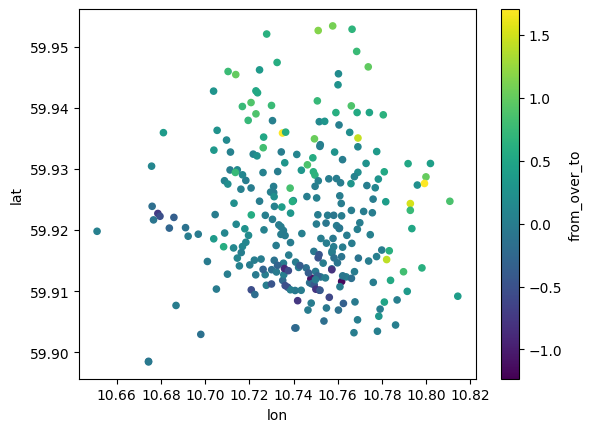

In [101]:
num_trips_from %>% 
  inner_join(num_trips_to, by = c("start_station_name"="end_station_name")) %>%
  mutate(from_to = log(num_trips.x/num_trips.y)) %>% 
  ggplot() +
  geom_point(aes(x=lat,y=lon, color=from_to)) +
  scale_fill_gradient(low = "grey", high = "brown")
